In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('./movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [6]:
 df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

### deal with missing values

In [7]:
df['color'].value_counts()

color
Color               4815
 Black and White     209
Name: count, dtype: int64

Removing the color section as most of the movies is colored

In [8]:
df.drop(columns='color', inplace=True)

In [9]:
## drop the link column
df.drop(columns='movie_imdb_link', inplace=True)

In [10]:
df.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [11]:
df.dropna(subset=['director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes',
                   'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'actor_1_name',
                    'actor_3_name', 'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country',
                    'actor_2_facebook_likes', 'plot_keywords'], inplace=True
                   )

In [12]:
df.isnull().sum()

director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        643
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
plot_keywords                  0
num_user_for_reviews           0
language                       0
country                        0
content_rating               169
budget                       352
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 209
movie_facebook_likes           0
dtype: int64

In [13]:
df['gross'].fillna(df['gross'].median(), inplace=True)

In [14]:
df['content_rating'].fillna('R', inplace=True)

In [15]:
df['budget'].fillna(df['budget'].median(), inplace=True)

In [16]:
df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace=True)

In [17]:
df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [18]:
## removing duplicate
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(4693, 26)

In [20]:
df['country'].value_counts()

country
USA               3567
UK                 420
France             149
Canada             106
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Russia              11
Ireland             11
Mexico              11
Denmark             11
South Africa         8
Brazil               8
Norway               7
Sweden               5
Netherlands          5
Thailand             4
Iran                 4
Argentina            4
Israel               3
West Germany         3
Switzerland          3
Belgium              3
Czech Republic       3
Romania              2
Taiwan               2
Poland               2
Iceland              2
Hungary              2
Greece               2
Official site        1
Cambodia             1
Afghanistan          1
Indonesia            1
Kyrgyzstan           1
Colombia             1
New

In [21]:
val_ = ['USA', 'UK']
df['country'].where(df['country'].isin(val_), 'other', inplace=True)

In [22]:
df['language'].value_counts()

language
English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Italian         10
Cantonese       10
Korean           8
Portuguese       8
Danish           5
Persian          4
Norwegian        4
Dutch            4
Swedish          4
Hebrew           4
Thai             3
Arabic           3
Dari             2
Indonesian       2
Zulu             2
Aboriginal       2
Vietnamese       1
Polish           1
Romanian         1
Czech            1
Dzongkha         1
Mongolian        1
Icelandic        1
Hungarian        1
Bosnian          1
Aramaic          1
Telugu           1
Kazakh           1
Maya             1
Filipino         1
Greek            1
Name: count, dtype: int64

removing the language column as most of them is english

In [23]:
df.drop(columns='language', inplace=True)

making new column for profit and profit percentage that each movie makes

In [24]:
df['profit'] = df['gross'] - df['budget']

In [25]:
df['profit_percentage'] = (df['profit'] / df['budget']) * 100

In [26]:
df.reset_index(drop=True, inplace=True)

In [27]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,profit_percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775


### data visualization

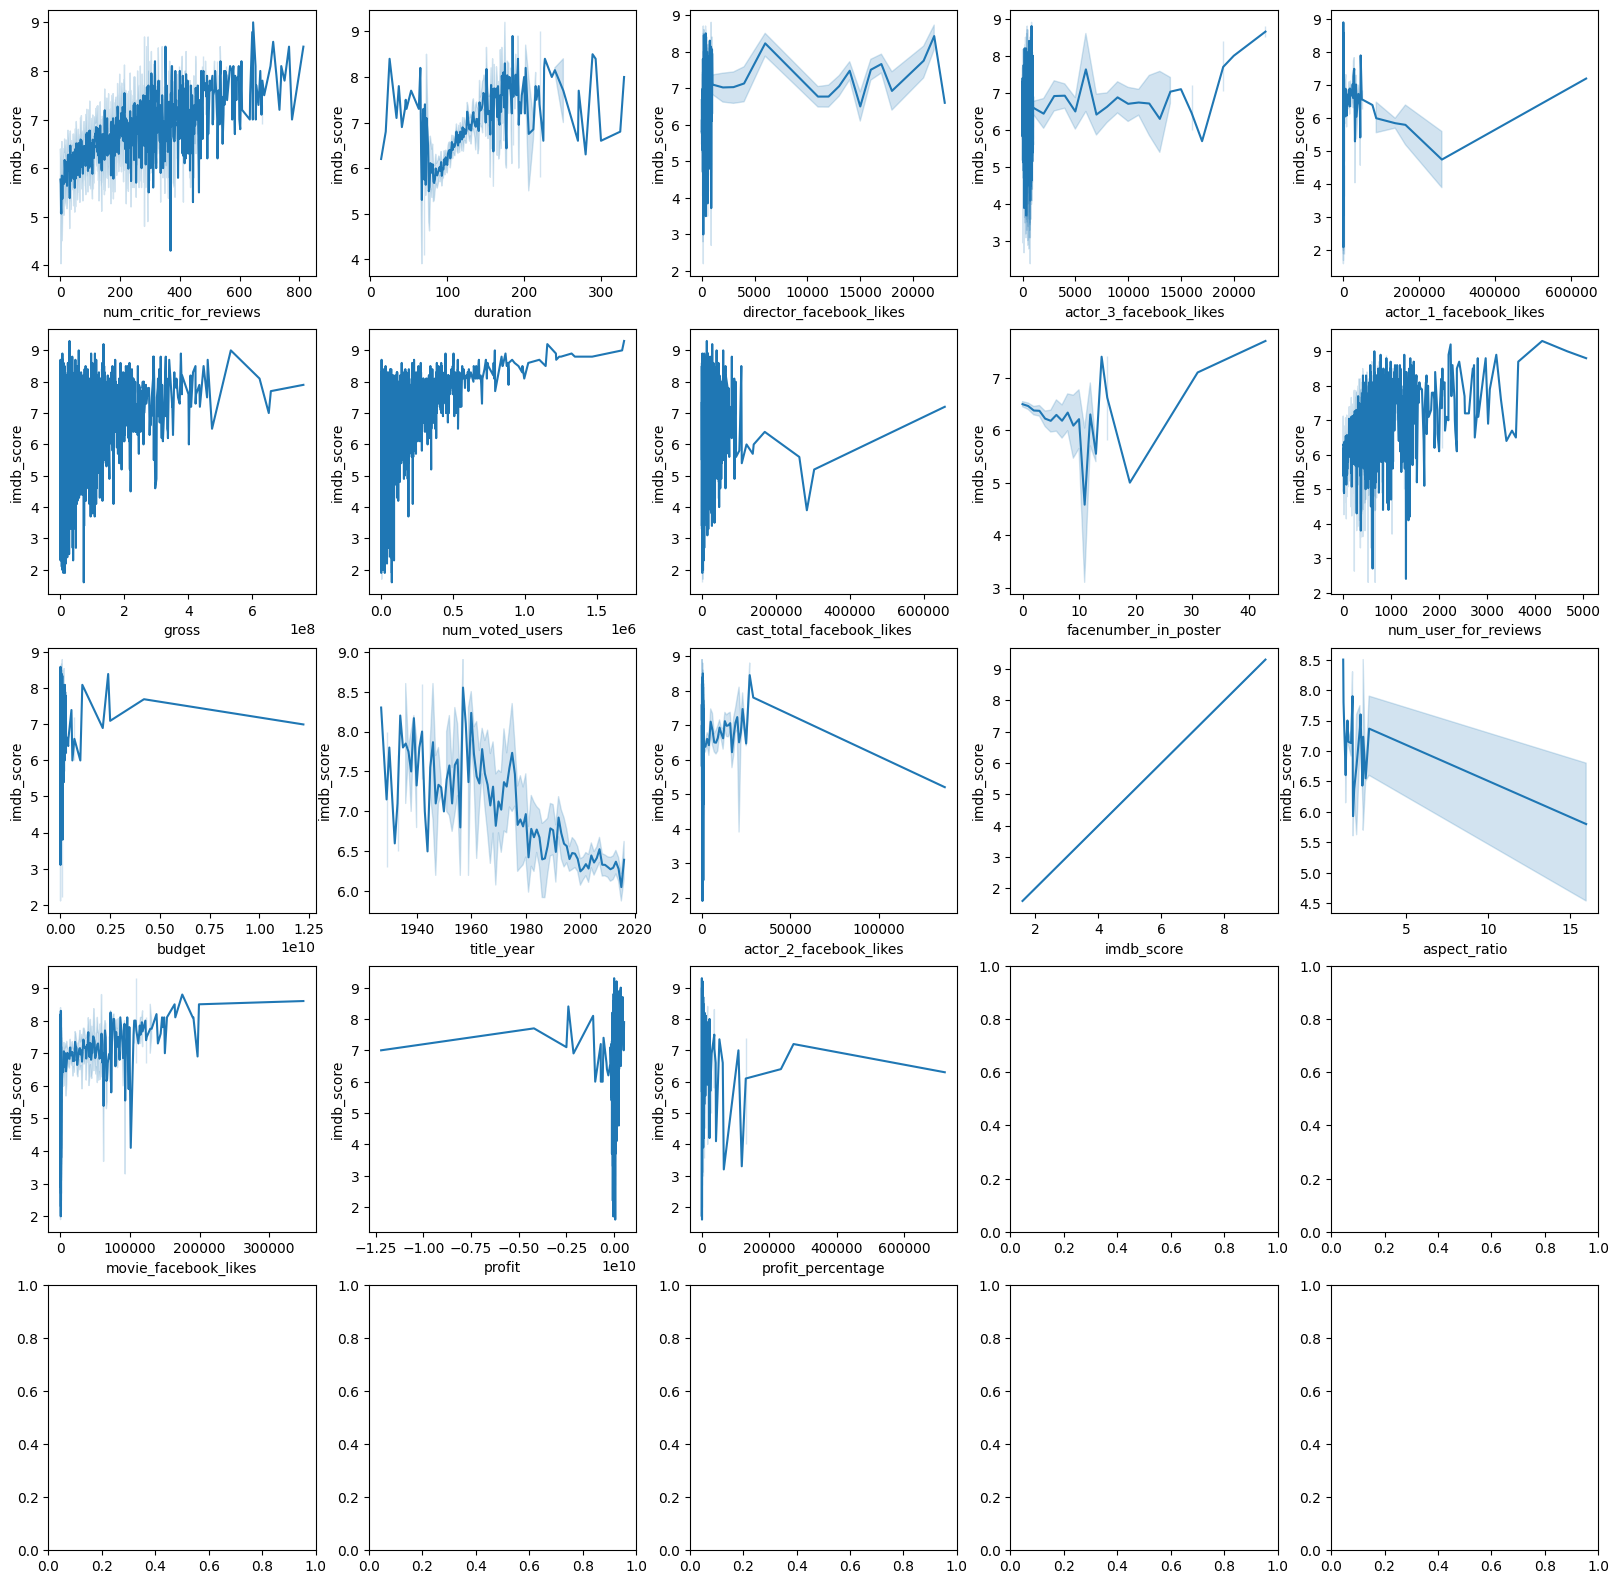

In [28]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for i, j in list(enumerate(df.select_dtypes(exclude='object').columns)):
    x, y = i // 5, i % 5
    sns.lineplot(
        data=df,
        x=j,
        y='imdb_score',
        ax=ax[x][y],
        
    )

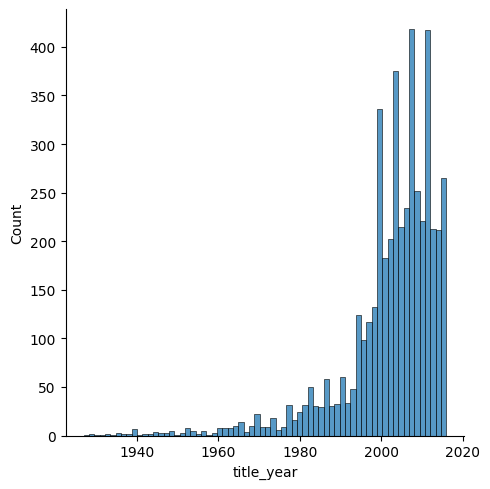

In [29]:
sns.displot(
    data=df,
    x='title_year'
)

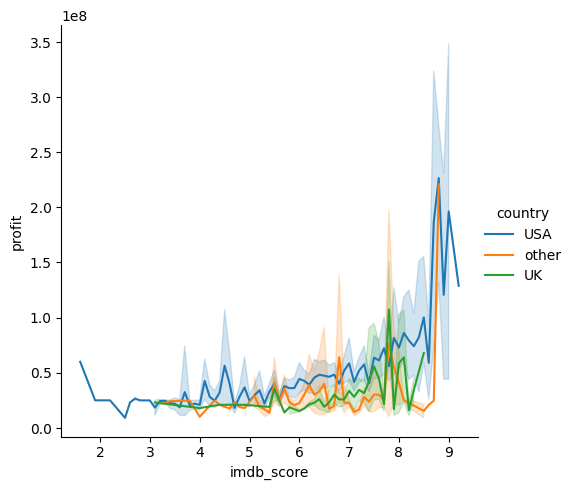

In [30]:
sns.relplot(
    data=df.loc[df['profit'].sort_values().index][-2000:],
    y='profit',
    x='imdb_score',
    hue='country',
    kind='line'
)

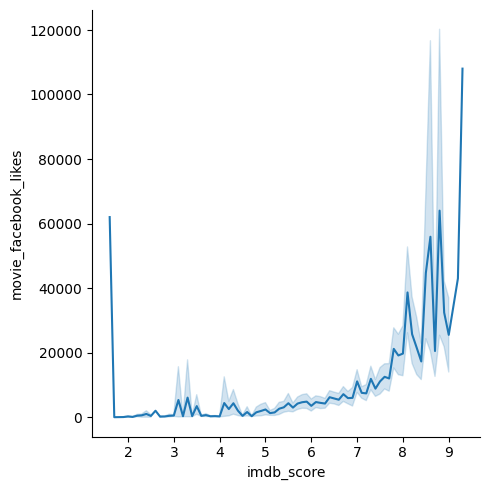

In [31]:
sns.relplot(
    data=df,
    y='movie_facebook_likes',
    x='imdb_score',
    kind='line'
)

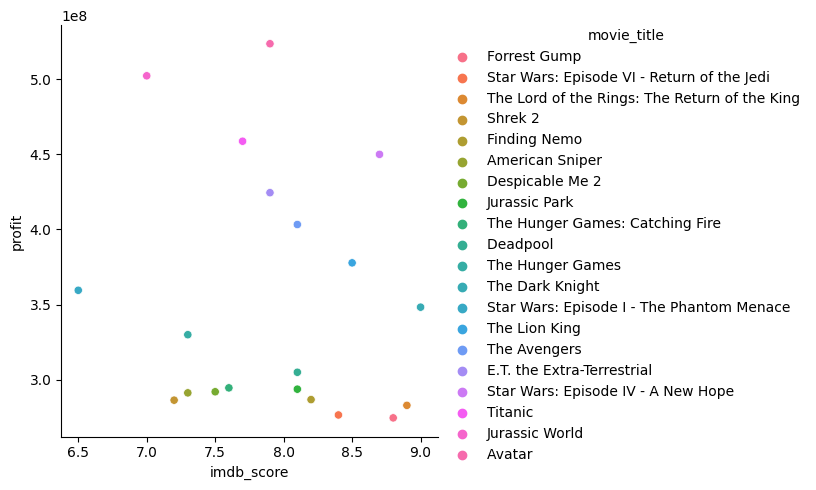

In [32]:
## top 20 movie by profit made
sns.relplot(
    data=df.loc[df['profit'].sort_values().index][-20:],
    x='imdb_score',
    y='profit',
    hue='movie_title'
)

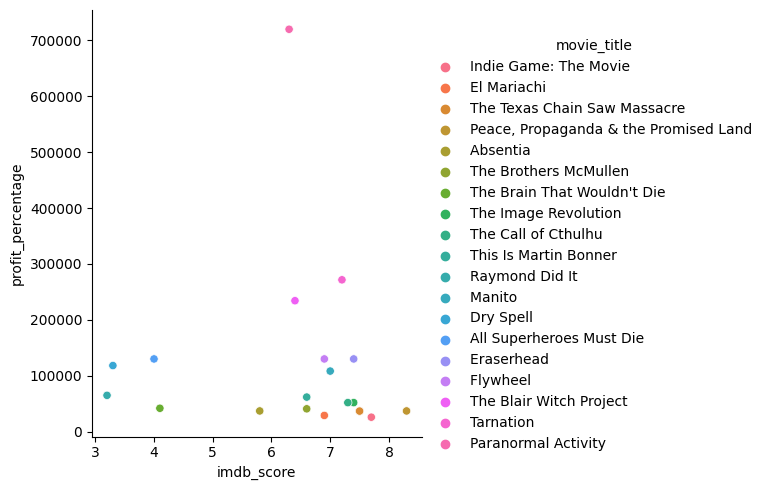

In [33]:
## top 20 movie by profit percentage
sns.relplot(
    data=df.loc[df['profit_percentage'].sort_values().index][-20:],
    x='imdb_score',
    y='profit_percentage',
    hue='movie_title'
)

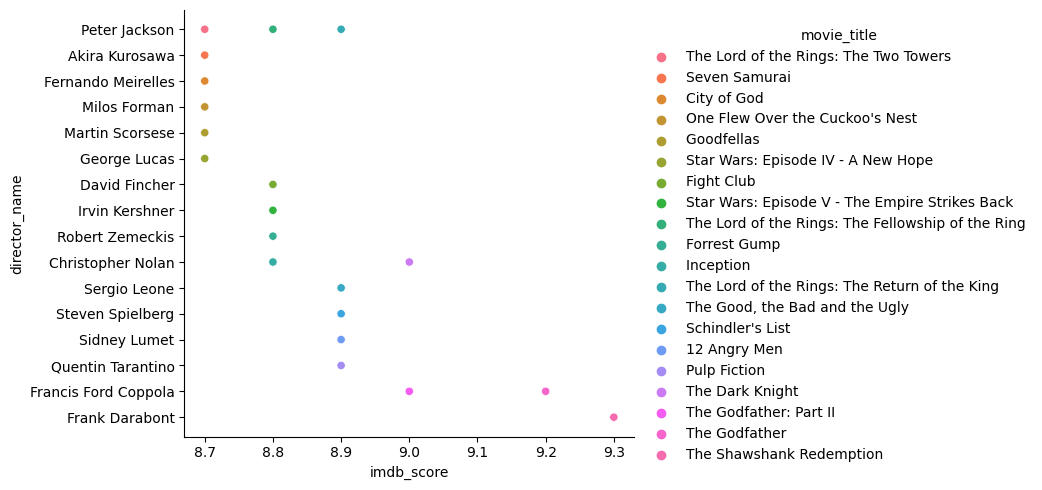

In [34]:
## top 20 director by imdb score
sns.relplot(
    data=df.loc[df['imdb_score'].sort_values().index][-20:],
    x='imdb_score',
    y='director_name',
    hue='movie_title',
    aspect=1.5
)

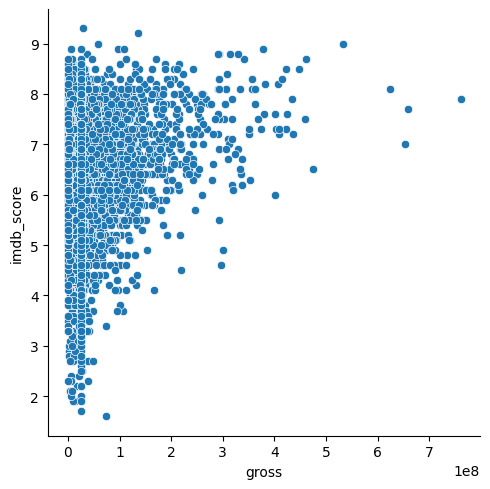

In [35]:
sns.relplot(
    data=df,
    y='imdb_score',
    x='gross',
)

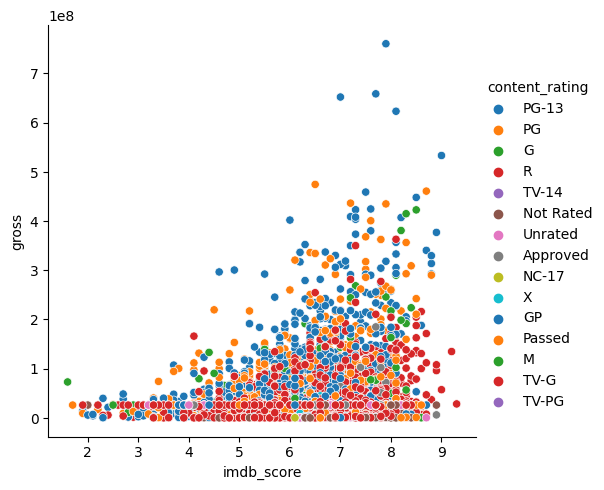

In [36]:
sns.relplot(
    data=df,
    x='imdb_score',
    y='gross',
    hue='content_rating',
    palette='tab10'
)

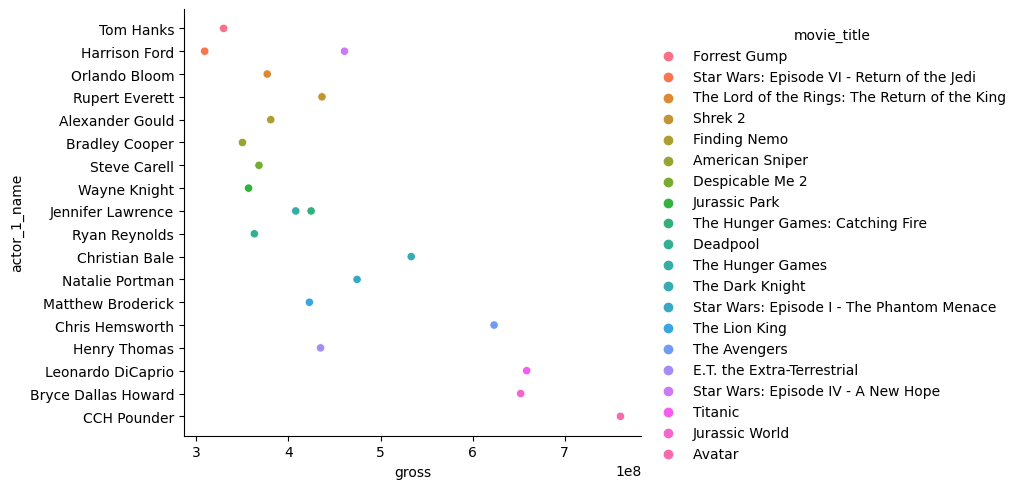

In [37]:
## top 20 actor by gross
sns.relplot(
    data=df.loc[df['profit'].sort_values().index][-20:],
    x='gross',
    y='actor_1_name',
    hue='movie_title',
    aspect=1.5
)

### removing usless columns

In [38]:
## drop columns with name
df.drop(columns=df.select_dtypes(include='object').columns[:-2], inplace=True)

In [39]:
## drop profit and profit percentage
df.drop(columns=['profit', 'profit_percentage'], inplace=True)

### removing correlacted variabels

<Axes: >

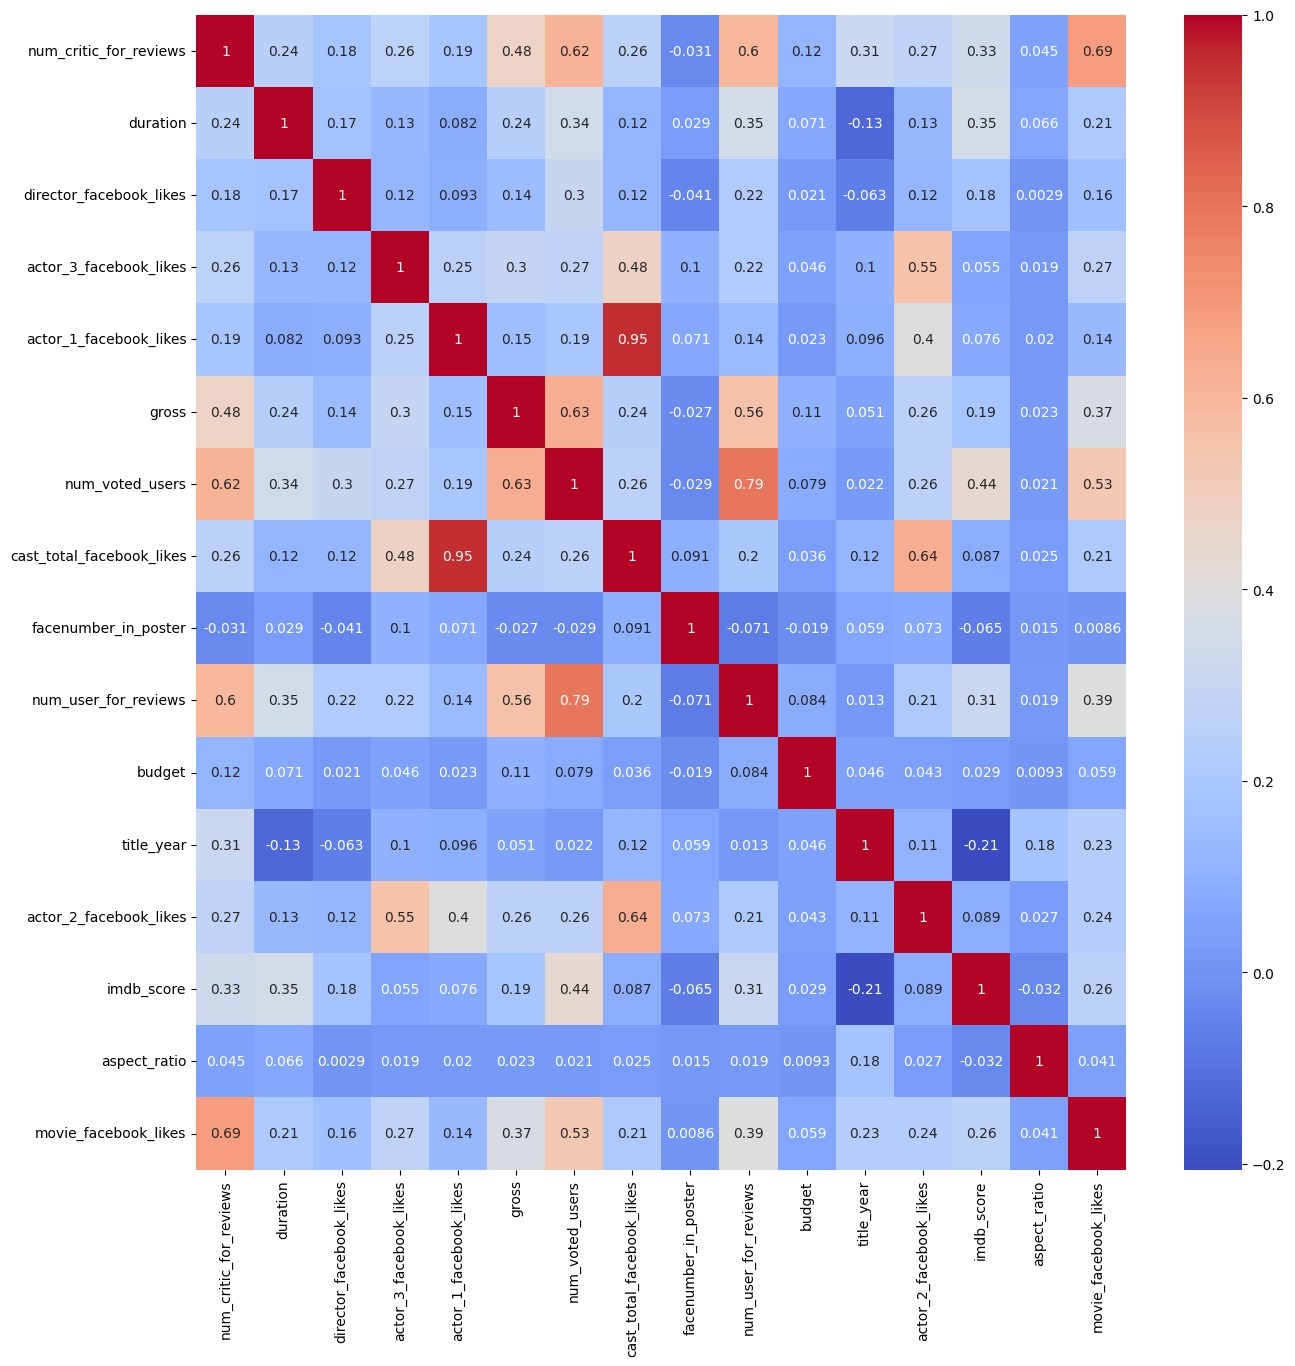

In [40]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)

In [41]:
df['other_actor_facebook_like'] = df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']

In [42]:
df.drop(columns=['actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes'], inplace=True)

In [43]:
df['critic_review_ratio']=df['num_critic_for_reviews'] / df['num_user_for_reviews']

In [44]:
df.drop(columns=['num_critic_for_reviews', 'num_user_for_reviews'], inplace=True)

<Axes: >

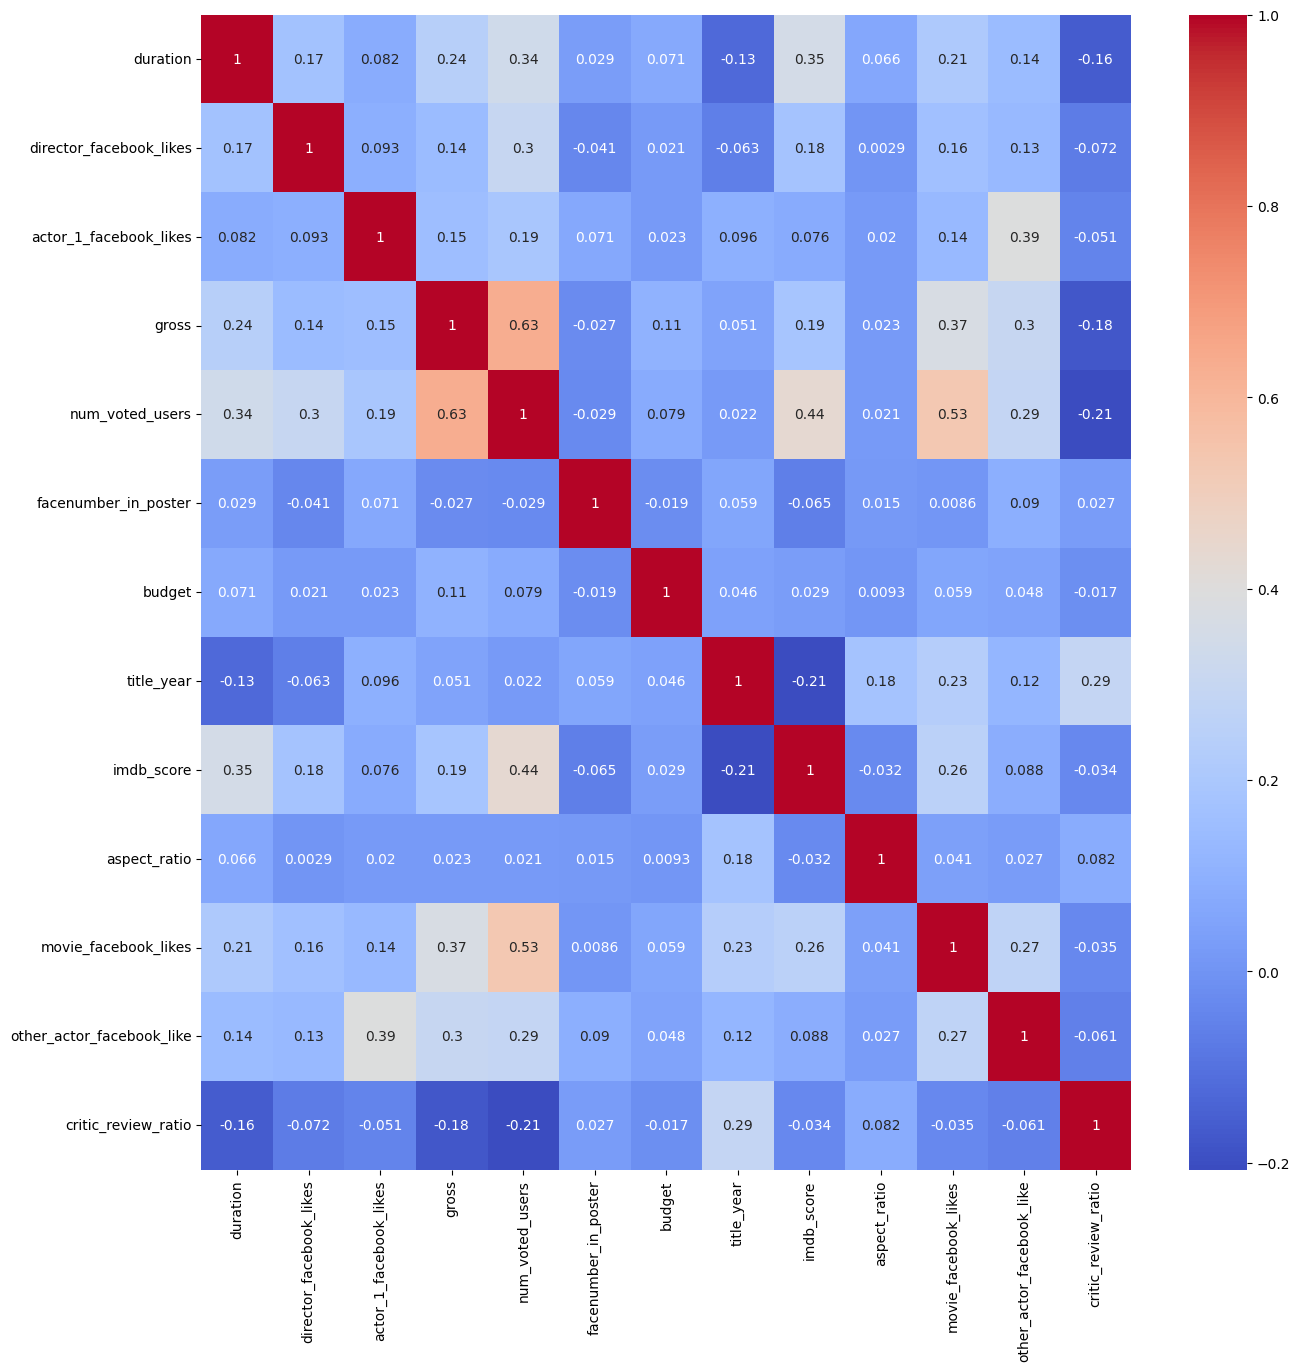

In [45]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)

In [46]:
## mark the imdb movies as bad, avrage, good, excelent
df['imdb_binned_score'] = pd.cut(df['imdb_score'], bins=[0, 4, 6, 8, 10], labels=False, right=True)

In [47]:
df.drop(columns='imdb_score', inplace=True)

In [48]:
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,country,content_rating,budget,title_year,aspect_ratio,movie_facebook_likes,other_actor_facebook_like,critic_review_ratio,imdb_binned_score
0,178.0,0.0,1000.0,760505847.0,886204,0.0,USA,PG-13,237000000.0,2009.0,1.78,33000,1791.0,0.236739,2
1,169.0,563.0,40000.0,309404152.0,471220,0.0,USA,PG-13,300000000.0,2007.0,2.35,0,6000.0,0.243942,2
2,148.0,0.0,11000.0,200074175.0,275868,1.0,UK,PG-13,245000000.0,2015.0,2.35,85000,554.0,0.605634,2
3,164.0,22000.0,27000.0,448130642.0,1144337,0.0,USA,PG-13,250000000.0,2012.0,2.35,164000,46000.0,0.301000,3
4,132.0,475.0,640.0,73058679.0,212204,1.0,USA,PG-13,263700000.0,2012.0,2.35,24000,1162.0,0.626016,2


### handeling the categorical data

In [49]:
df = pd.get_dummies(data=df, columns=['country', 'content_rating'])

### model development

In [50]:
df.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'num_voted_users', 'facenumber_in_poster', 'budget',
       'title_year', 'aspect_ratio', 'movie_facebook_likes',
       'other_actor_facebook_like', 'critic_review_ratio', 'imdb_binned_score',
       'country_UK', 'country_USA', 'country_other', 'content_rating_Approved',
       'content_rating_G', 'content_rating_GP', 'content_rating_M',
       'content_rating_NC-17', 'content_rating_Not Rated', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_Passed', 'content_rating_R',
       'content_rating_TV-14', 'content_rating_TV-G', 'content_rating_TV-PG',
       'content_rating_Unrated', 'content_rating_X'],
      dtype='object')

In [51]:
X = df[['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'num_voted_users', 'facenumber_in_poster', 'budget',
       'title_year', 'aspect_ratio', 'movie_facebook_likes',
       'other_actor_facebook_like', 'critic_review_ratio',
       'country_UK', 'country_USA', 'country_other', 'content_rating_Approved',
       'content_rating_G', 'content_rating_GP', 'content_rating_M',
       'content_rating_NC-17', 'content_rating_Not Rated', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_Passed', 'content_rating_R',
       'content_rating_TV-14', 'content_rating_TV-G', 'content_rating_TV-PG',
       'content_rating_Unrated', 'content_rating_X']].copy()
y = df['imdb_binned_score']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [53]:
sc_x = StandardScaler()

### feature scaling

In [54]:
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

### Classification Model Selection

#### Logistic Regrreion

In [55]:
lreg = LogisticRegression(max_iter=500)

In [56]:
lreg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [57]:
y_predict = lreg.predict(X_test)

In [58]:
accuracy_score(y_test, y_predict)

0.7052556818181818

In [59]:
confusion_matrix(y_test, y_predict)

array([[  0,  26,   9,   0],
       [  0, 163, 243,   0],
       [  1, 102, 798,   8],
       [  0,   2,  24,  32]])

#### KNN

In [60]:
knn = KNeighborsClassifier()

In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
y_knn = knn.predict(X_test)

In [63]:
print(accuracy_score(y_test, y_knn), confusion_matrix(y_test, y_knn), sep='\n' * 2)


0.6455965909090909

[[  2  22  11   0]
 [ 12 187 207   0]
 [  8 195 700   6]
 [  0   3  35  20]]


#### SVC

In [64]:
svc = SVC()

In [65]:
svc.fit(X_train, y_train)

SVC()

In [66]:
y_svc = svc.predict(X_test)

In [67]:
print(accuracy_score(y_test, y_svc), confusion_matrix(y_test, y_svc), sep='\n' * 2)


0.7102272727272727

[[  0  20  15   0]
 [  0 137 269   0]
 [  0  67 840   2]
 [  0   1  34  23]]


#### Naive Bayes

In [68]:
nb = GaussianNB()

In [69]:
nb.fit(X_train, y_train)

GaussianNB()

In [70]:
y_nb = nb.predict(X_test)

In [71]:
print(accuracy_score(y_test, y_nb), confusion_matrix(y_test, y_nb), sep='\n' * 2)

0.06747159090909091

[[ 33   1   0   1]
 [364  13   1  28]
 [633  18   1 257]
 [  9   1   0  48]]


#### Decision Tree

In [72]:
dtree = DecisionTreeClassifier()

In [73]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
y_dtree = dtree.predict(X_test)

In [75]:
print(accuracy_score(y_test, y_dtree), confusion_matrix(y_test, y_dtree), sep='\n' * 2)

0.6455965909090909

[[  2  20  13   0]
 [ 32 202 170   2]
 [ 21 185 670  33]
 [  1   2  20  35]]


#### Ada Boosting

In [76]:
ada = AdaBoostClassifier(estimator=dtree, n_estimators=60)

In [77]:
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=60)

In [78]:
y_ada = ada.predict(X_test)

In [79]:
print(accuracy_score(y_test, y_ada), confusion_matrix(y_test, y_ada), sep='\n' * 2)

0.6612215909090909

[[  3  18  13   1]
 [ 26 211 166   3]
 [ 28 170 681  30]
 [  1   1  20  36]]


#### Random Forest

In [80]:
rf = RandomForestClassifier(n_estimators=200)

In [81]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [82]:
y_rf = rf.predict(X_test)

In [83]:
print(accuracy_score(y_test, y_rf), confusion_matrix(y_test, y_rf), sep='\n' * 2)

0.7514204545454546

[[  1  22  12   0]
 [  0 206 200   0]
 [  0  77 825   7]
 [  0   1  31  26]]


#### Bagging Classifier

In [94]:
bgclf = BaggingClassifier(n_estimators=60, max_samples= 0.7, oob_score=True)

In [95]:
bgclf.fit(X_train, y_train)

BaggingClassifier(max_samples=0.7, n_estimators=60, oob_score=True)

In [96]:
bgclf.oob_score_

0.7366818873668188

#### Gradiant boosting

In [99]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.09, max_depth=5)

In [101]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.09, max_depth=5, n_estimators=50)

In [102]:
y_gbc = gbc.predict(X_test)

In [103]:
print(accuracy_score(y_test, y_gbc), confusion_matrix(y_test, y_gbc), sep='\n' * 2)

0.7386363636363636

[[  1  27   7   0]
 [  5 220 180   1]
 [  3 103 791  12]
 [  0   1  29  28]]


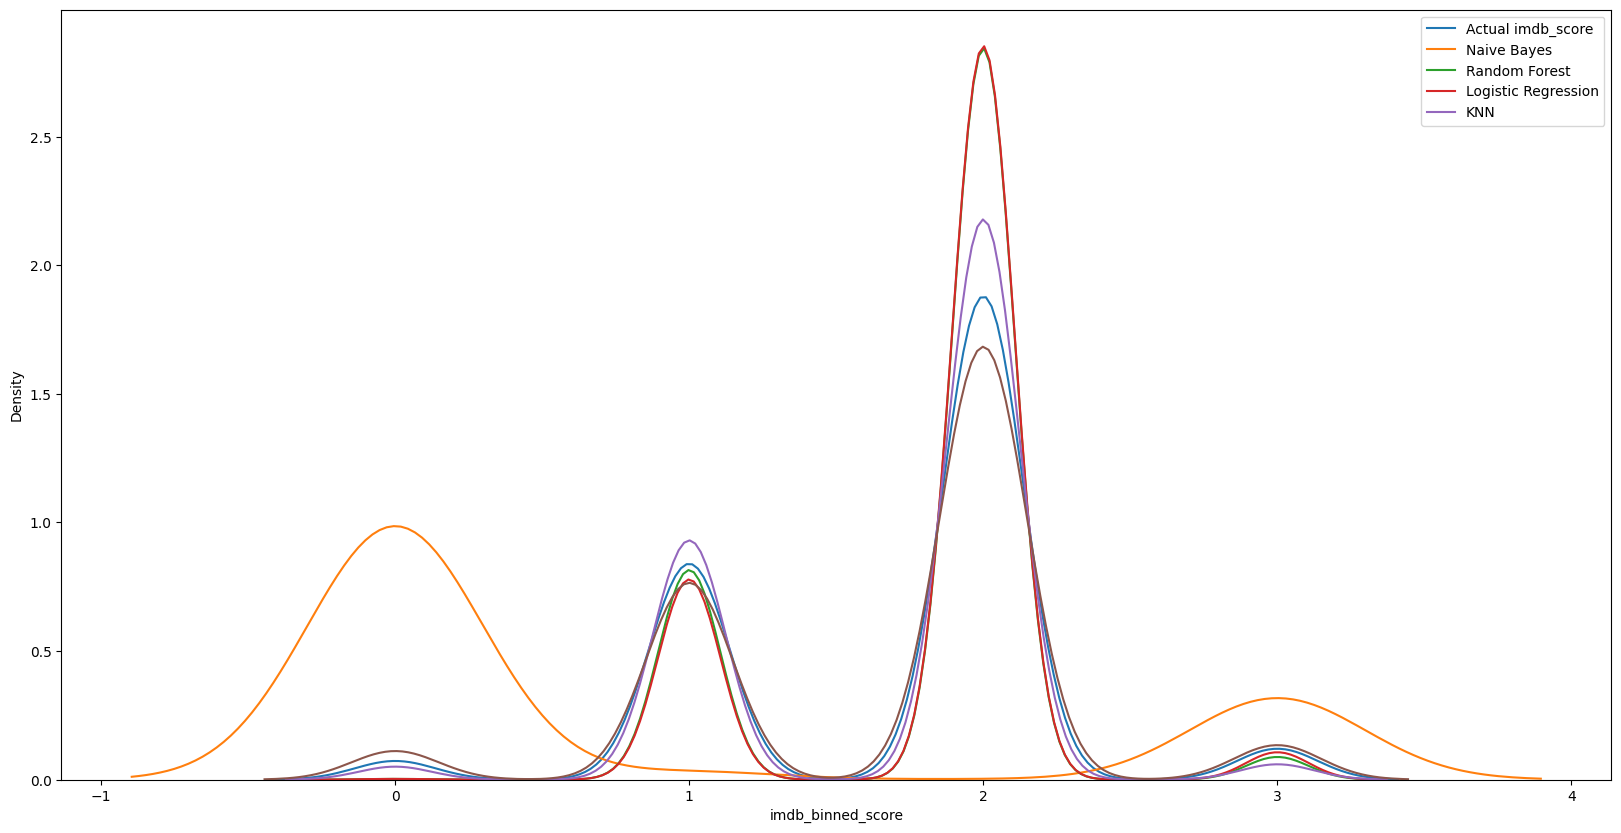

In [142]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(x=y_test, ax=ax, label='Actual imdb_score')
sns.kdeplot(x=y_nb, ax=ax, label='Naive Bayes')
sns.kdeplot(x=y_rf, ax=ax, label='Random Forest')
sns.kdeplot(x=y_predict, ax=ax, label='Logistic Regression')
sns.kdeplot(x=y_knn, ax=ax, label='KNN')
sns.kdeplot(x=y_ada, ax=ax);
ax.legend()